In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models, optimizers
import pandas as pd
from sklearn.metrics import confusion_matrix
import shutil
import sys

import os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,Dropout
from keras.utils import to_categorical
from sklearn.utils import resample
import cv2 as cv

In [2]:
directory_path= r"C:\melanoma_cancer_dataset\train\benign"

In [3]:
X_train=[]
y_train=[]

for filename in os.listdir(directory_path):
        # Check if the file is an image (assuming JPG format here)
        if filename.endswith(".jpg"):
            # Read the image using OpenCV
            image = cv.imread(os.path.join(directory_path, filename))
            # resized image
            new_width, new_height = 224, 224  # replace with your desired width and height
            resized_img = cv.resize(image, (new_width, new_height)) 
            resized_img=resized_img/255.0
            # Check the label of image 
            y_train.append([1])
            X_train.append(resized_img)
directory_path= r"C:\melanoma_cancer_dataset\train\malignant"
for filename in os.listdir(directory_path):
        # Check if the file is an image (assuming JPG format here)
        if filename.endswith(".jpg"):
            # Read the image using OpenCV
            image = cv.imread(os.path.join(directory_path, filename))
            # resized image
            new_width, new_height = 224, 224  # replace with your desired width and height
            resized_img = cv.resize(image, (new_width, new_height)) 
            resized_img=resized_img/255.0
            # Check the label of image 
            y_train.append([0])
            X_train.append(resized_img)
# directory_path = r"C:\melanoma_cancer_dataset\train\benign"
# for i in range(5001,9064):
#     file_path=os.path.join(directory_path, f"melanoma_{i}.jpg")
#     img=cv.imread(file_path)
#     X_train.append(img)
#     y_train.append([1])

In [4]:
X_train=np.array(X_train)
y_train=np.array(y_train)

In [5]:
X_train.shape

(9605, 224, 224, 3)

In [6]:
directory_path= r"C:\melanoma_cancer_dataset\test\benign"
X_test=[]
y_test=[]
for filename in os.listdir(directory_path):
        # Check if the file is an image (assuming JPG format here)
        if filename.endswith(".jpg"):
            # Read the image using OpenCV
            image = cv.imread(os.path.join(directory_path, filename))
            # resized image
            new_width, new_height = 224, 224  # replace with your desired width and height
            resized_img = cv.resize(image, (new_width, new_height)) 
            resized_img=resized_img/255.0
            
            # Check the label of image 
            y_test.append([1])
            X_test.append(resized_img)
directory_path=r"C:\melanoma_cancer_dataset\test\malignant"
for filename in os.listdir(directory_path):
        # Check if the file is an image (assuming JPG format here)
        if filename.endswith(".jpg"):
            # Read the image using OpenCV
            image = cv.imread(os.path.join(directory_path, filename))
            # resized image
            new_width, new_height = 224, 224  # replace with your desired width and height
            resized_img = cv.resize(image, (new_width, new_height)) 
            resized_img=resized_img/255.0
            # Check the label of image 
            y_test.append([0])
            X_test.append(resized_img)

In [7]:
X_test=np.array(X_test)
y_test=np.array(y_test)
X_test.shape

(1000, 224, 224, 3)

In [20]:
import tensorflow as tf

# Define the CNN model architecture
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3),strides=2, activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2),strides=1))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2),strides=2))


model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))

model.add(layers.MaxPooling2D((2, 2),strides=1))
model.add(layers.GlobalMaxPooling2D())
model.add(layers.Dense(1080, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1, activation='sigmoid'))


model.summary()    

metrics = ['accuracy',
               tf.keras.metrics.Precision(name='precision'),
               tf.keras.metrics.Recall(name='recall')]
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(),
                  loss='binary_crossentropy',
                  metrics=metrics)

history = model.fit(X_train, y_train,batch_size=16 ,epochs=10,shuffle=True,
                        validation_data=(X_test, y_test))

# Evaluate the model
# test_loss, test_accuracy = model.evaluate(test_images, test_labels)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 55, 55, 32)        4736      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 27, 27, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 25, 25, 64)        18496     
                                                                 
 batch_normalization_2 (Batc  (None, 25, 25, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                      

In [21]:
with tf.device('/device:CPU:0'):
    y_pred = model.predict(X_test)

32/32 [==============================] - 1s 24ms/step


In [22]:
# Convert the predicted probabilities to class labels
threshold = 0.5

y_pred_classes = np.where(y_pred >= threshold, 1, 0)

conf_mat = confusion_matrix(y_test, y_pred_classes)

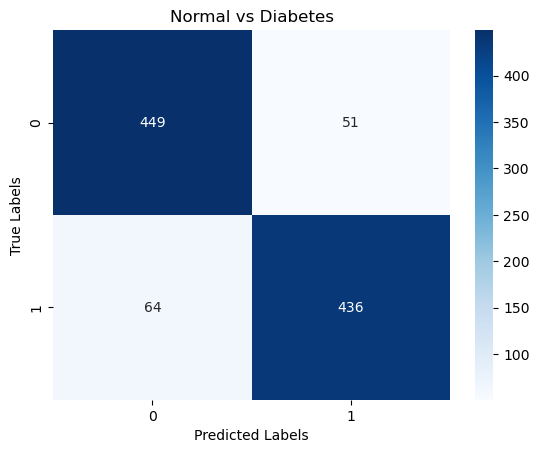

In [23]:
# Compute the confusion matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred_classes)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues",fmt='g')

# Add labels and title to the plot
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Normal vs Diabetes")

# Show the plot
plt.show()

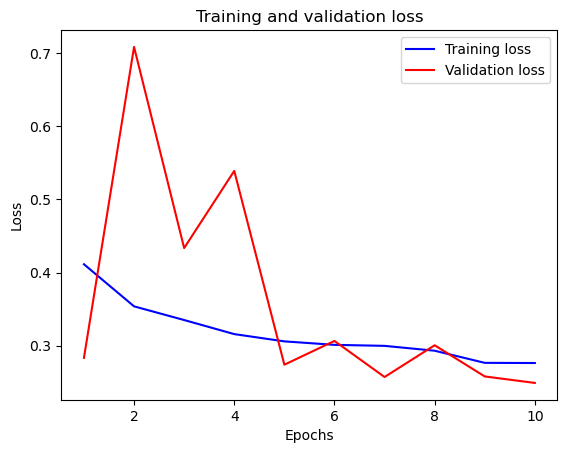

In [24]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'b-', label='Training loss')
plt.plot(epochs, val_loss, 'r-', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

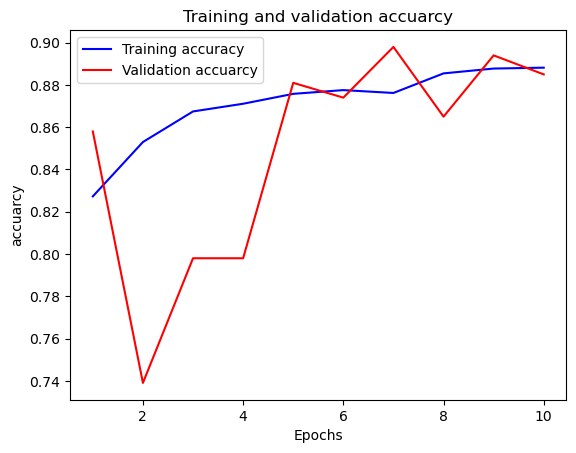

In [25]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_accuracy) + 1)

plt.plot(epochs, train_accuracy, 'b-', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r-', label='Validation accuarcy')
plt.title('Training and validation accuarcy')
plt.xlabel('Epochs')
plt.ylabel('accuarcy')
plt.legend()

plt.show()